In [257]:
#Reading data from dataset
import pandas as pd
import numpy as np
from ipywidgets import *
from IPython.display import display,HTML
import matplotlib.pyplot as plt
import seaborn as sns
Mdataset=pd.read_csv(r"C:\Users\SURYA PRAKASH\Documents\movies.csv")
Rdataset=pd.read_csv(r"C:\Users\SURYA PRAKASH\Documents\ratings.csv")

In [203]:
Mdataset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [204]:
Mdataset['genres']=Mdataset['genres'].str.split("|")

In [205]:
Mdataset.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [206]:
Mdataset1=Mdataset.explode('genres')

In [208]:
Mdataset1

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [125]:
Rdataset

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [209]:
#merging both datasets 
movies=Mdataset1.merge(Rdataset,on="movieId",how="inner")

In [210]:
movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,2,5.0,859046895
1,1,Toy Story (1995),Adventure,5,4.0,1303501039
2,1,Toy Story (1995),Adventure,8,5.0,858610933
3,1,Toy Story (1995),Adventure,11,4.0,850815810
4,1,Toy Story (1995),Adventure,14,4.0,851766286
...,...,...,...,...,...,...
281899,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
281900,148626,The Big Short (2015),Drama,458,4.0,1452014749
281901,148626,The Big Short (2015),Drama,576,4.5,1451687664
281902,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [211]:
# understanding the distribution of the features
movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,2,5.0,859046895
1,1,Toy Story (1995),Adventure,5,4.0,1303501039
2,1,Toy Story (1995),Adventure,8,5.0,858610933
3,1,Toy Story (1995),Adventure,11,4.0,850815810
4,1,Toy Story (1995),Adventure,14,4.0,851766286


In [212]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281904 entries, 0 to 281903
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    281904 non-null  int64  
 1   title      281904 non-null  object 
 2   genres     281904 non-null  object 
 3   userId     281904 non-null  int64  
 4   rating     281904 non-null  float64
 5   timestamp  281904 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 12.9+ MB


In [213]:
movies.describe()

,movieId,userId,rating,timestamp
count,281904.000000,281904.000000,281904.000000,2.819040e+05
mean,14145.495626,361.282380,3.530353,1.138102e+09
std,26647.297178,196.264625,1.039671,1.817972e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1041.000000,192.000000,3.000000,9.747113e+08
50%,2529.000000,377.000000,3.500000,1.130272e+09
75%,6537.000000,545.000000,4.000000,1.280807e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [214]:
movies.drop(['timestamp'],axis=1,inplace=True)

In [215]:
movies.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [216]:
movies.duplicated().sum()

0

In [217]:
# finding unique users and movies
# Unique users
df=movies.copy()
unique_users = df['userId'].nunique()
print(f"Number of unique users: {unique_users}")

# Unique movies
unique_movies = df['movieId'].nunique()
print(f"Number of unique movies: {unique_movies}")

Number of unique users: 668
Number of unique movies: 10325


In [218]:
# Average rating and total movies at genre level
genre_stats = df.groupby('genres').agg({'rating': 'mean','movieId': 'count'})
genre_stats.rename(columns={'rating': 'Average_Rating', 'movieId': 'Total_Movies'}, inplace=True)
print(genre_stats)


                    Average_Rating  Total_Movies
genres                                          
(no genres listed)        3.071429             7
Action                    3.451450         31205
Adventure                 3.518027         23076
Animation                 3.635350          5966
Children                  3.439429          8098
Comedy                    3.420996         38055
Crime                     3.642392         18291
Documentary               3.643035          1206
Drama                     3.650266         46960
Fantasy                   3.500459         10889
Film-Noir                 3.913636          1210
Horror                    3.281097          7983
IMAX                      3.641821          3032
Musical                   3.571962          4287
Mystery                   3.652043          8320
Romance                   3.544255         19094
Sci-Fi                    3.454481         16795
Thriller                  3.495561         29288
War                 

In [219]:
genre_stats

,Average_Rating,Total_Movies
genres,,
(no genres listed),3.071429,7
Action,3.451450,31205
Adventure,3.518027,23076
Animation,3.635350,5966
Children,3.439429,8098
Comedy,3.420996,38055
Crime,3.642392,18291
Documentary,3.643035,1206
Drama,3.650266,46960


In [220]:
# Unique genres considered
unique_genres = df['genres'].unique()
print("Unique genres considered:")
print(unique_genres)
df=df[df['genres']!="(no genres listed)"]

Unique genres considered:
['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX' 'War'
 'Musical' 'Documentary' 'Western' 'Film-Noir' '(no genres listed)']


In [221]:
movies

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure,2,5.0
1,1,Toy Story (1995),Adventure,5,4.0
2,1,Toy Story (1995),Adventure,8,5.0
3,1,Toy Story (1995),Adventure,11,4.0
4,1,Toy Story (1995),Adventure,14,4.0
...,...,...,...,...,...
281899,148238,A Very Murray Christmas (2015),Comedy,475,3.0
281900,148626,The Big Short (2015),Drama,458,4.0
281901,148626,The Big Short (2015),Drama,576,4.5
281902,148626,The Big Short (2015),Drama,668,4.5


In [264]:
tpmovies=movies.groupby('title')['title'].count().sort_values(ascending=False)
tpmovies

title
Pulp Fiction (1994)        1300
Forrest Gump (1994)        1244
Jurassic Park (1993)       1176
Toy Story (1995)           1160
Lion King, The (1994)      1074
                           ... 
Tex (1982)                    1
Plaza Suite (1971)            1
Hard to Be a God (2013)       1
Testament (1983)              1
See Spot Run (2001)           1
Name: title, Length: 10323, dtype: int64

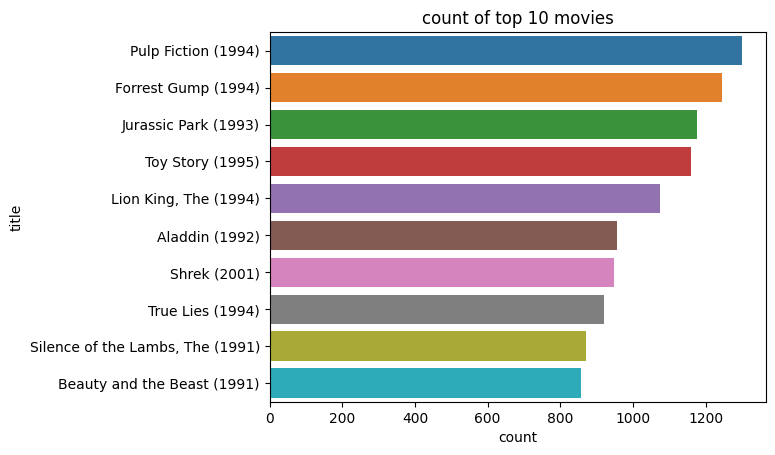

In [265]:
# count of top ten movies
sns.barplot(y=tpmovies.index[:10],x=tpmovies.values[:10])
plt.title('count of top 10 movies')
plt.xlabel('count')
plt.show()

In [266]:
tpcuser=movies.groupby('userId')['userId'].count().sort_values(ascending=False)
tpcuser

userId
668    13098
575     6695
458     5188
232     3904
128     3532
       ...  
131       48
172       48
90        47
237       46
125       42
Name: userId, Length: 668, dtype: int64

In [267]:
indices=[]
for i in tpcuser.index[:10]:
    indices.append(str(i))

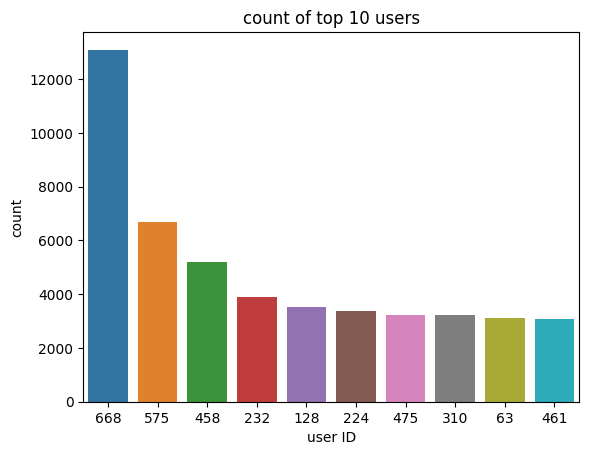

In [268]:
#top 10 users
sns.barplot(x=indices,y=tpcuser.values[:10])
plt.title('count of top 10 users')
plt.xlabel('user ID')
plt.ylabel('count')
plt.show()

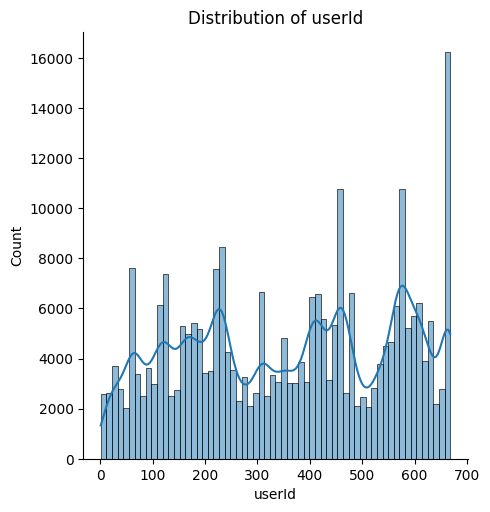

In [270]:
#distribution of user ID
sns.displot(movies['userId'],kde=True)
plt.title('Distribution of userId')
plt.show()

In [273]:
tpgener=movies.groupby('genres')['genres'].count().sort_values(ascending=False)
tpgener

genres
Drama                 46960
Comedy                38055
Action                31205
Thriller              29288
Adventure             23076
Romance               19094
Crime                 18291
Sci-Fi                16795
Fantasy               10889
Mystery                8320
Children               8098
Horror                 7983
Animation              5966
War                    5828
Musical                4287
IMAX                   3032
Western                2314
Film-Noir              1210
Documentary            1206
(no genres listed)        7
Name: genres, dtype: int64

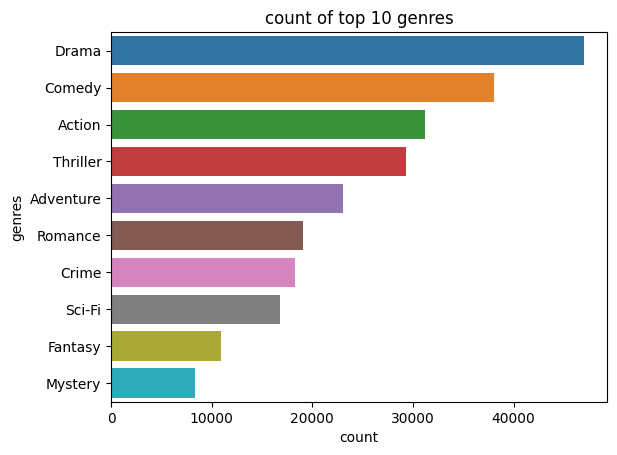

In [274]:
# count of top ten genres
sns.barplot(y=tpgener.index[:10],x=tpgener.values[:10])
plt.title('count of top 10 genres')
plt.xlabel('count')
plt.show()

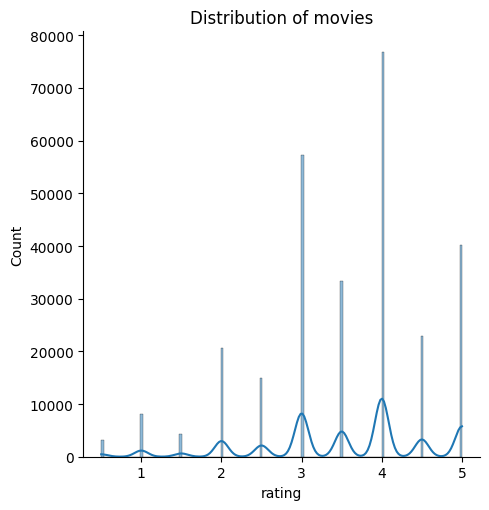

In [271]:
# distribution of movies based on rating
sns.displot(movies['rating'],kde=True)
plt.title('Distribution of movies')
plt.show()

  # popularity_recommender 

In [222]:
#User Defined Function to display topN movies to be recommended 

def popularity_recommender(genre,num_ratings_threshold,topN):
 #Calculating mean of ratings and number of ratings
    popularity_df=df.groupby(['genres','title']).agg({'rating':["mean","size"]}).reset_index()
    popularity_df.columns=['genre','title','ratings_mean','ratings_counts']
  
 #Filtering desired genre and number of reviews threshold 
    topN_recommendations=popularity_df[(popularity_df['genre'].str.contains(genre, case=False)) & (popularity_df['ratings_counts']>=num_ratings_threshold)].sort_values(by=['ratings_mean'],ascending=False).head(topN)
  
 #displaying output structure
    topN_recommendations['S.No']=list(range(1,len(topN_recommendations)+1))
    topN_recommendations.index=range(len(topN_recommendations))
    topN_recommendations.columns=['Genre','Movie Title','Average Movie Rating','Num Reviews','S.No']
    return topN_recommendations[['S.No','Movie Title','Average Movie Rating','Num Reviews']]

In [223]:
#taking input from users
def on_button_clicked(b):
    genre_input =G.value
    rating_threshold = M.value
    num_recommendations = N.value
    df=movies.copy()
    recommendations = popularity_recommender(genre_input, rating_threshold,num_recommendations)
    print("Popularity-based Recommendations:")
    display(recommendations)

In [224]:
Gd = widgets.HTML('<p style="width: 170px; display: inline-block;">Gener:</p>')
Md = widgets.HTML('<p style="width: 170px; display: inline-block;">Minimumreviewsthreshold(t):</p>')
Nd = widgets.HTML('<p style="width: 170px; display: inline-block;">Num recommendations (N) :</p>')
Bd = widgets.HTML('<p style="width: 170px; display: inline-block;">recommend Movie</p>')
G=Text()
M=IntText()
N=IntText()
B=Button(description='recommend Movie')
B.on_click(on_button_clicked)
i =HBox([Gd,G])
j=HBox([Md,M])
k=HBox([Nd,N])
Interface=VBox([i,j,k,B],layout=Layout(display='flex', justify_content='center', align_items='center'))
Interface 


Popularity-based Recommendations:


,S.No,Movie Title,Average Movie Rating,Num Reviews
0,1,"Matrix, The (1999)",4.264368,261
1,2,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
2,3,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224
3,4,Inception (2010),4.189320,103
4,5,Star Wars: Episode IV - A New Hope (1977),4.188645,273
5,6,Fight Club (1999),4.188406,207
6,7,Blade Runner (1982),4.169872,156
7,8,"Princess Bride, The (1987)",4.163743,171
8,9,Aliens (1986),4.146497,157
9,10,"Dark Knight, The (2008)",4.141732,127


# Content based recommendation

In [225]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from ipywidgets import *
from IPython.display import display,HTML

In [226]:
#Creating a string of genres in order to apply TF-IDF further
movies_gener=df.groupby("title").agg({"genres":lambda x : " ".join(list(x))}).reset_index()
movies_gener

,title,genres
0,'71 (2014),Action Drama Thriller War
1,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy
2,'Round Midnight (1986),Drama Musical
3,'Til There Was You (1997),Drama Drama Drama Romance Romance Romance
4,"'burbs, The (1989)",Comedy Comedy Comedy Comedy Comedy Comedy Come...
...,...,...
10311,loudQUIETloud: A Film About the Pixies (2006),Documentary
10312,xXx (2002),Action Action Action Action Action Action Acti...
10313,xXx: State of the Union (2005),Action Action Action Action Action Action Acti...
10314,¡Three Amigos! (1986),Comedy Comedy Comedy Comedy Comedy Comedy Come...


In [227]:

#Running TF-IDF using n grams from 1 to 3, this can be experimented with as well 
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0.0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_gener['genres'])
#Computing cosine similarity 
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [228]:
#User defined function to recommend similar movies
def recommendations_genre(movie_df,similarity_matrix,movie_title,topN=5):
    #Target movie title
    titles = movie_df['title']
    #Index of all other movies 
    indices = pd.Series(movie_df.index, index=movie_df['title'])
    #Index of target movie 
    index = indices[movie_title]
    #Generating cosine similarity scores
    cosine_similarity_scores = list(enumerate(similarity_matrix[index]))
    #Descending order sorting based on scores
    cosine_similarity_scores = sorted(cosine_similarity_scores, key=lambda x: x[1], reverse=True)
    #Selecting topN movies to be recommended ( it can contain the same movie as well, hence choosing topN+2)
    cosine_similarity_scores = cosine_similarity_scores[1:topN+2]
    #Extracting matched movies 
    matching_movies = [i[0] for i in cosine_similarity_scores]
    matches_df=movie_df.iloc[matching_movies]
    matches_df=matches_df[matches_df['title']!=movie_title]
    #Refactoring output 
    matches_df.rename(columns={'title':'Movie Title'},inplace=True)
    matches_df['S.No']=range(1,len(matches_df)+1)
    matches_df.index=range(len(matches_df))
    return matches_df[['S.No','Movie Title']].head(topN)

movie_title
Toy Story (1995)
Shrek the Third (2007)
The Lego Movie (2014)

In [230]:
#taking input from users
def on_button_clicked2(b):
    movie_title=MV.value
    topN=N.value
    df=movies.copy()
    recommendations_2=recommendations_genre(movie_df=movies_gener,similarity_matrix=cosine_sim,movie_title=movie_title,topN=topN)
    print("content-based Recommendations:")
    display(recommendations_2)

In [238]:
MVd = widgets.HTML('<p style="width: 170px; display: inline-block;"> Movie Title (t):</p>')
Nd = widgets.HTML('<p style="width: 170px; display: inline-block;">Num recommendations (N) :</p>')

MV=Text()
N=IntText()
B2=Button(description='recommend Movie')
B2.on_click(on_button_clicked2)
i =HBox([MVd,MV])
k=HBox([Nd,N])
Interface2=VBox([i,k,B2],layout=Layout(display='flex', justify_content='center', align_items='center'))
Interface2 


content-based Recommendations:


,S.No,Movie Title
0,1,Shrek the Third (2007)
1,2,"Emperor's New Groove, The (2000)"
2,3,Antz (1998)
3,4,"Pagemaster, The (1994)"
4,5,Toy Story 2 (1999)
5,6,"Monsters, Inc. (2001)"
6,7,Toy Story (1995)
7,8,"Adventures of Rocky and Bullwinkle, The (2000)"
8,9,"Lord of the Rings, The (1978)"
9,10,Atlantis: The Lost Empire (2001)


# collaborative based recommender

In [240]:
#Using pivot table to create a one hot encoded vector for all the movies 
movies4=Mdataset1.pivot_table(index=['title'],columns=['genres']).fillna(0).applymap(lambda x: int(x>0)).reset_index()

movies4.index=range(0,len(movies4))
new_columns=['title']+list(map(lambda x : x[1] , movies4.columns))[1:]
movies4.columns=new_columns

#Generating new data frame representing binarized genres 
movies5=pd.merge(Mdataset[['title','movieId']],movies4)

In [241]:
movies6=movies5[['title','movieId']]
movies6.head()

ratings=Rdataset.copy()

def FetchUserHistory(userid):
    user_ratings=ratings[ratings['userId']==userid]
    user_history=pd.merge(user_ratings,movies6,how="inner",on="movieId").sort_values('movieId')
    return user_history

def SimilarUsersRecommendations(target_user_id,p,k,topN):
    user_history=FetchUserHistory(userid=target_user_id)
    similar_users = ratings[ratings['movieId'].isin(user_history['movieId'].tolist())]
    similar_uses_num_movie_reviewed=similar_users.groupby("userId").agg({"movieId":"nunique"}).reset_index().rename(columns={'movieId':'num_movies_reviewed'}).sort_values(by='num_movies_reviewed',ascending=False)
    similar_uses_num_movie_reviewed=similar_uses_num_movie_reviewed[similar_uses_num_movie_reviewed['userId']!=target_user_id]
    movies_rated_by_target_user=user_history['movieId'].nunique()
    min_movies_rated_threshold=int(movies_rated_by_target_user*(p/100))
    similar_uses_num_movie_reviewed=similar_uses_num_movie_reviewed[similar_uses_num_movie_reviewed['num_movies_reviewed']>=min_movies_rated_threshold]
    bestN_similar_users=similar_users[similar_users['userId'].isin(list(set(similar_uses_num_movie_reviewed.userId)))]
    user_vector=user_history.pivot(index='userId',columns=['movieId'],values=['rating'])
    user_vector.columns=[str(each[1]) for each in user_vector.columns]
    bestN_vectors=bestN_similar_users.pivot(index='userId',columns=['movieId'],values=['rating']).fillna(0)
    bestN_vectors.columns=[str(each[1]) for each in bestN_vectors.columns]
    for each in set(user_vector.columns)-set(bestN_vectors.columns):
        bestN_vectors[each]=0.0
    bestN_vectors=bestN_vectors[user_vector.columns]
    similarity_df=pd.DataFrame(cosine_similarity(user_vector,bestN_vectors)).T
    similarity_df.index=bestN_vectors.index
    similarity_df.columns=['similarity_score']
    topK_user_ids=list(similarity_df.sort_values('similarity_score',ascending=False).index[:k])
    similar_users_subset=ratings[(ratings['userId'].isin(topK_user_ids))]
    similar_users_subset=similar_users_subset[~similar_users_subset['movieId'].isin(user_history['movieId'])]
    best_recommended_movies=similar_users_subset.groupby('movieId').mean()[['rating']].reset_index().sort_values('rating',ascending=False)[:topN]
    output_df=pd.merge(best_recommended_movies,movies6)
    output_df.columns=['Movie ID','Average Rating', "Movie Title"]
    output_df['S.No']=range(1,len(output_df)+1)
    user_history.rename(columns={'title':"Movie Title"},inplace=True)
    user_history=user_history.sort_values('rating',ascending=False)
    user_history['S.No']=range(1,len(user_history)+1)
    return user_history[['S.No',"Movie Title"]],output_df[['S.No',"Movie Title"]]

In [254]:
#taking input from users
def on_button_clicked3(b):
    target_user_id=us.value
    p=t.value
    k=100
    topN=N.value
    history,recommendations_3=SimilarUsersRecommendations(target_user_id=target_user_id,p=p,k=k,topN=topN)
    print("collaborative-based Recommendations (history):")
    display( history)
    print("collaborative-based Recommendations (movies):")
    display(recommendations_3)

In [256]:
usd= widgets.HTML('<p style="width: 170px; display: inline-block;"> UserID:</p>')
Nd = widgets.HTML('<p style="width: 170px; display: inline-block;">Num recommendations (N) :</p>')
td = widgets.HTML('<p style="width: 170px; display: inline-block;">Threshold for similar users (k):</p>')

us=IntText()
N=IntText()
t=IntText()
B3=Button(description='recommend Movie')
B3.on_click(on_button_clicked3)
i =HBox([usd,us])
j=HBox([Nd,N])
k=HBox([td,t])
Interface3=VBox([i,j,k,B3],layout=Layout(display='flex', justify_content='center', align_items='center'))
Interface3 


collaborative-based Recommendations (history):


,S.No,Movie Title
123,1,M*A*S*H (a.k.a. MASH) (1970)
93,2,Tarzan (1999)
26,3,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
101,4,"Color Purple, The (1985)"
29,5,Love in the Afternoon (1957)
...,...,...
106,120,Dudley Do-Right (1999)
97,121,Mystery Men (1999)
73,122,"Big Lebowski, The (1998)"
96,123,Lake Placid (1999)


collaborative-based Recommendations (movies):


,S.No,Movie Title
0,1,Never Let Me Go (2010)
1,2,Hard Core Logo (1996)
2,3,"Endless Summer 2, The (1994)"
3,4,Grave of the Fireflies (Hotaru no haka) (1988)
4,5,"Gunfighter, The (1950)"
5,6,Heaven & Earth (1993)
6,7,Brewster's Millions (1985)
7,8,Wings (1927)
8,9,"Ballad of Narayama, The (Narayama Bushiko) (1958)"
9,10,Great Expectations (1946)
